In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [175]:
df = pd.read_csv('User behavior sample 2.csv')
df.head()

,UserId,OrderId,Status,OrderDate,OrderTime,ASAP,DeliveredTime,CompletionTime,Distance,RestaurantID,TotalItem,Order Value,TotalDiscount,PaymentMethod,DeviceOSType,AppType,Category
0,997400,760984,Delivered,5/1/18,13:07:46,True,5/1/18 14:44,96.817067,6.2,141966,4,222000,0,Cash,Web,Foody,"[Food, Lunch]"
1,997400,880315,Delivered,5/30/18,13:09:14,True,5/30/18 13:42,33.700000,6.2,141966,2,165000,0,Cash,Web,Foody,"[Food, Lunch]"
2,997400,876172,Delivered,5/29/18,14:51:52,True,5/29/18 15:24,32.150000,6.2,141966,2,190500,0,Cash,Web,Foody,"[Food, Lunch]"
3,997400,763694,Delivered,5/2/18,11:06:15,True,5/2/18 12:01,54.972550,8.7,1630,6,213000,0,Cash,Web,Foody,[Food]
4,997405,773532,Delivered,5/4/18,18:35:37,True,5/4/18 19:39,63.697100,4.0,7924,6,202500,0,Cash,iOS,Foody,"[Food, Lunch]"


**Data info:**
- data types 
- missing values

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserId          634 non-null    int64  
 1   OrderId         634 non-null    int64  
 2   Status          634 non-null    object 
 3   OrderDate       634 non-null    object 
 4   OrderTime       634 non-null    object 
 5   ASAP            634 non-null    bool   
 6   DeliveredTime   554 non-null    object 
 7   CompletionTime  554 non-null    float64
 8   Distance        634 non-null    float64
 9   RestaurantID    634 non-null    int64  
 10  TotalItem       634 non-null    int64  
 11  Order Value     634 non-null    int64  
 12  TotalDiscount   634 non-null    int64  
 13  PaymentMethod   634 non-null    object 
 14  DeviceOSType    634 non-null    object 
 15  AppType         634 non-null    object 
 16  Category        634 non-null    object 
dtypes: bool(1), float64(2), int64(6), o

**Datetime convert:**

In [177]:
df['Order_Time'] = pd.to_datetime(df['OrderDate']+' '+df['OrderTime'], format='%m/%d/%y %H:%M:%S')
df['DeliveredTime'] = pd.to_datetime(df['DeliveredTime'], format='%m/%d/%y %H:%M')
df.drop(['OrderDate', 'OrderTime'], axis=1, inplace=True)
# sort value by Order_Time
df.sort_values('Order_Time', inplace=True)
df[['Order_Time', 'DeliveredTime']].head(3)

,Order_Time,DeliveredTime
426,2018-05-01 10:37:51,2018-05-01 11:25:00
54,2018-05-01 12:30:37,2018-05-01 13:44:00
500,2018-05-01 12:47:26,2018-05-01 13:54:00


**special feild with list type element :'Category' need to dummy it**

In [178]:
df['Category'].value_counts()

[Food]                    295
[Food, Lunch]             294
[Food, Drink]              22
[Streetfood]               20
[Dessert, Food, Drink]      3
Name: Category, dtype: int64

In [179]:
df['Category'].unique()

array(['[Food, Lunch]', '[Food]', '[Streetfood]', '[Food, Drink]',
       '[Dessert, Food, Drink]'], dtype=object)

In [180]:
# string convert function
def foo(value):
    return value.replace('[','').replace(']','').replace(' ','').split(',')

# get all category value
category_values = []
for value in df['Category'].unique(): 
    category_values += foo(value)
    
# remove_duplicates
category_values = list(dict.fromkeys(category_values )) 
category_values

['Food', 'Lunch', 'Streetfood', 'Drink', 'Dessert']

convert Category:

In [181]:
df['Category'] = [foo(value) for value in df['Category']]
df[['Category']].head(3)

,Category
426,"[Food, Lunch]"
54,[Food]
500,[Food]


**Make Dummy:**

In [182]:
for value in category_values:
    condistion = [value in values for values in  df['Category']]
    df.loc[condistion, value] = 1
    df.loc[df[value].isna(), value] = 0 # fill na 
df[category_values].head()

,Food,Lunch,Streetfood,Drink,Dessert
426,1.0,1.0,0.0,0.0,0.0
54,1.0,0.0,0.0,0.0,0.0
500,1.0,0.0,0.0,0.0,0.0
0,1.0,1.0,0.0,0.0,0.0
536,1.0,1.0,0.0,0.0,0.0


In [191]:
df.head(3).T

,426,54,500
UserId,1046393,1041255,1047209
OrderId,768475,704331,1483682
Status,Delivered,Delivered,Delivered
ASAP,True,True,True
DeliveredTime,2018-05-01 11:25:00,2018-05-01 13:44:00,2018-05-01 13:54:00
CompletionTime,47.3175,73.969,67.5478
Distance,3.4,9.7,7
RestaurantID,273297,207545,47666
TotalItem,3,3,7
Order Value,112500,435000,406500


In [184]:
df.describe()

,UserId,OrderId,CompletionTime,Distance,RestaurantID,TotalItem,Order Value,TotalDiscount,Food,Lunch,Streetfood,Drink,Dessert
count,6.340000e+02,6.340000e+02,554.000000,634.000000,634.000000,634.000000,6.340000e+02,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,9.688571e+05,1.056884e+06,47.831788,3.122871,380113.574132,4.947950,2.089675e+05,9117.886435,0.968454,0.463722,0.031546,0.039432,0.004732
std,1.598436e+05,3.768437e+05,42.071615,2.149793,304798.481951,7.629377,2.056828e+05,18143.088647,0.174925,0.499076,0.174925,0.194775,0.068680
min,6.111180e+05,7.043310e+05,6.216667,0.100000,88.000000,1.000000,3.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.041242e+06,7.924375e+05,27.845117,1.500000,80140.000000,2.000000,9.750000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043298e+06,8.555955e+05,38.639108,2.650000,276228.500000,3.000000,1.620000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.045338e+06,1.513407e+06,54.181154,4.300000,693831.000000,6.000000,2.400000e+05,10000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.047630e+06,1.820447e+06,552.299283,13.000000,747459.000000,111.000000,2.446500e+06,147850.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Section 1 - Data Analysis - Key Metrics

## A.	Determine user behaviors and any other parameters you think make sense for a company like ours


###  Time dimenstion:
some field: ['TotalItem', 'Order Value', 'TotalDiscount', 'avg_time']

sum of 'TotalItem', 'Order Value', 'TotalDiscount', 'avg_time' by day:

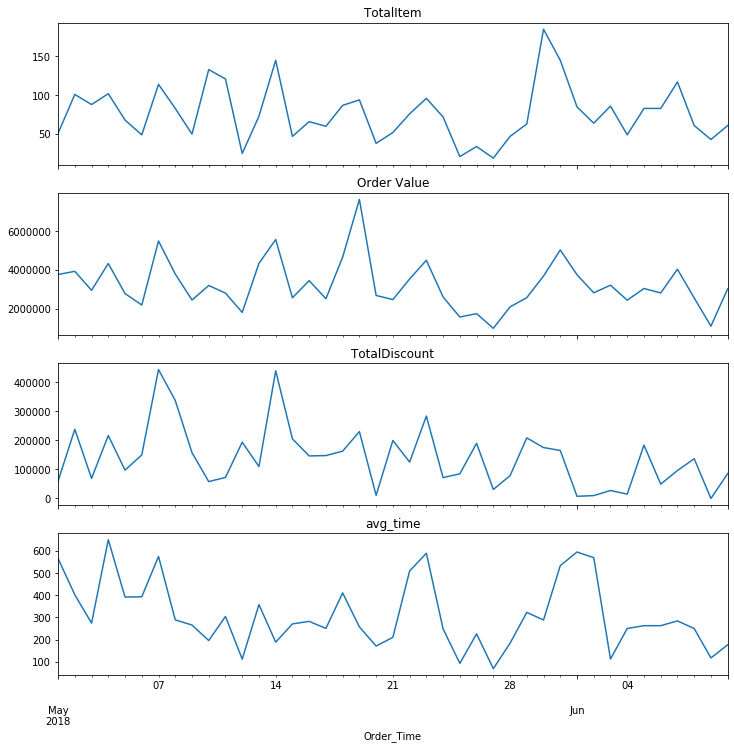

In [225]:
df1 = df.copy()
df1['avg_time'] = df1['CompletionTime']/ df1['Distance']
cols = ['TotalItem', 'Order Value', 'TotalDiscount', 'avg_time']
fig, axs = plt.subplots(nrows=len(cols), figsize=(12,12), sharex=True)
for ax, col in zip(axs, cols):
    df1.set_index(['Order_Time']).resample('1d').sum()[col].plot(ax =ax)
    ax.set_title(col)

Khó có thể thấy xu hướng theo từng ngày của cả 4 chỉ số trên. 

Vậy chúng ta xẽ theo dõi thêm xu hướng theo các ngày trong tuần và các giờ trong ngày

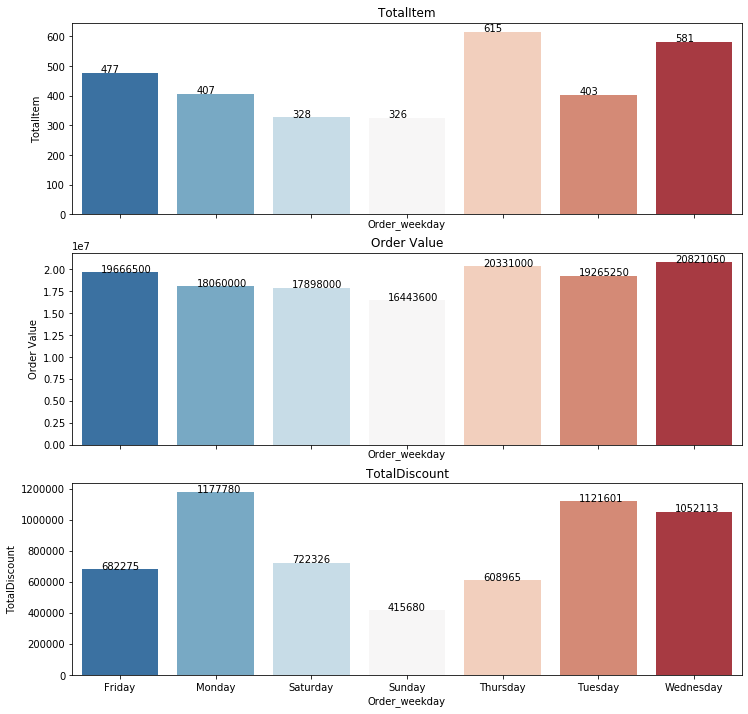

In [284]:
df1['Order_weekday'] = df['Order_Time'].dt.day_name()
cols = ['TotalItem', 'Order Value', 'TotalDiscount']
fig, axs = plt.subplots(nrows=len(cols), figsize=(12,12), sharex=True)
for ax, col in zip(axs, cols):
    dftemp = df1.groupby('Order_weekday').agg(sum)[col]
    sns.barplot(x=dftemp.index, y=dftemp, 
                palette=sns.color_palette("RdBu_r",7),
                ax=ax)
    for x, y in enumerate( dftemp):
        ax.text(x-0.2, y, str(round(y,2)))
    ax.set_title(col)

các giờ trong ngày

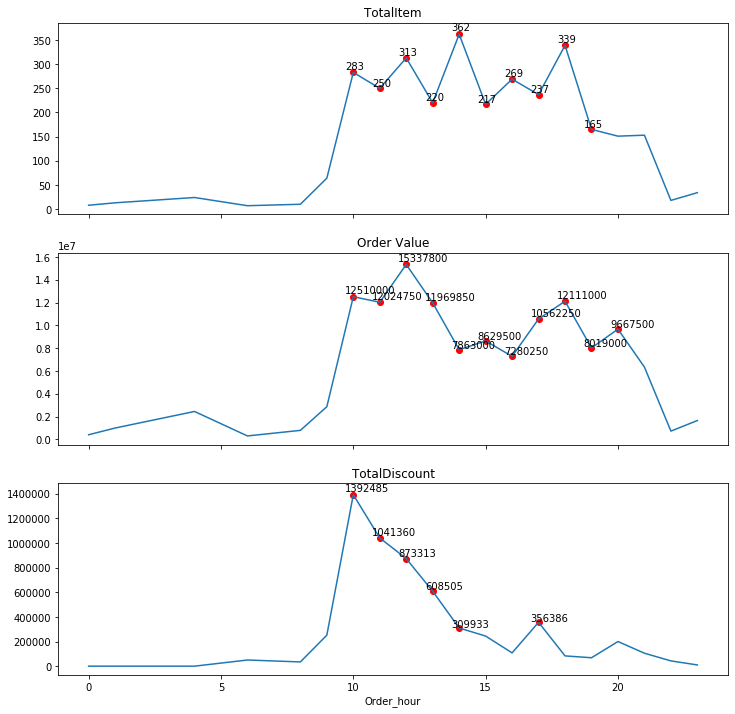

In [257]:
df1['Order_hour'] = df['Order_Time'].dt.hour
cols = ['TotalItem', 'Order Value', 'TotalDiscount']
fig, axs = plt.subplots(nrows=len(cols), figsize=(12,12), sharex=True)
for ax, col in zip(axs, cols):
    dftemp = df1.groupby('Order_hour').agg(sum)[col]
    hightemp = dftemp[dftemp > dftemp.mean()]
    
    dftemp.plot(ax =ax)
    ax.scatter(x=hightemp.index,
               y=hightemp, 
               label='high point', 
               color='red')
    for x, y in zip(hightemp.index, hightemp):
        ax.text(x-0.3, y*1.02, str(round(y,2)))
    ax.set_title(col)

In [ ]:
Các điểm có giá trị lớn hơn trung bình đều tập trung tại khu vajc từ 10 đến 20 giờ 
anh phân tích tiep nha

In [292]:
df.head()

,UserId,OrderId,Status,ASAP,DeliveredTime,CompletionTime,Distance,RestaurantID,TotalItem,Order Value,...,PaymentMethod,DeviceOSType,AppType,Category,Order_Time,Food,Lunch,Streetfood,Drink,Dessert
426,1046393,768475,Delivered,True,2018-05-01 11:25:00,47.317500,3.4,273297,3,112500,...,Cash,iOS,Foody,"[Food, Lunch]",2018-05-01 10:37:51,1.0,1.0,0.0,0.0,0.0
54,1041255,704331,Delivered,True,2018-05-01 13:44:00,73.969050,9.7,207545,3,435000,...,Cash,Android,Foody,[Food],2018-05-01 12:30:37,1.0,0.0,0.0,0.0,0.0
500,1047209,1483682,Delivered,True,2018-05-01 13:54:00,67.547833,7.0,47666,7,406500,...,Cash,Web,Now,[Food],2018-05-01 12:47:26,1.0,0.0,0.0,0.0,0.0
0,997400,760984,Delivered,True,2018-05-01 14:44:00,96.817067,6.2,141966,4,222000,...,Cash,Web,Foody,"[Food, Lunch]",2018-05-01 13:07:46,1.0,1.0,0.0,0.0,0.0
536,611160,1483951,Delivered,False,2018-05-01 13:51:00,40.853667,1.4,273297,2,127500,...,Cash,Android,Now,"[Food, Lunch]",2018-05-01 13:10:41,1.0,1.0,0.0,0.0,0.0


## B.	Determine patterns of top users in terms of GMV

In [293]:
cols = ['PaymentMethod', 'DeviceOSType', 'AppType']

PaymentMethod
DeviceOSType
AppType


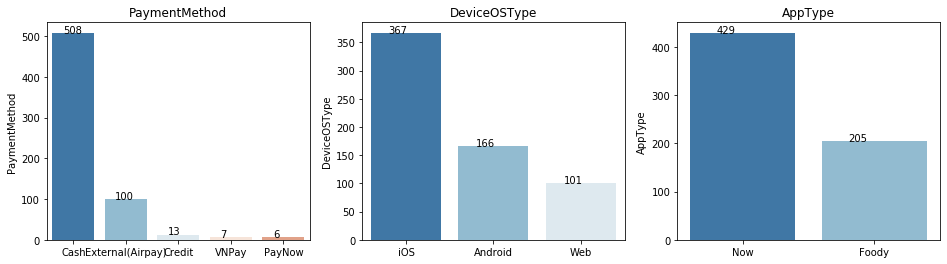

In [324]:
cols = ['PaymentMethod', 'DeviceOSType', 'AppType']
fig, axs = plt.subplots(ncols=len(cols), figsize=(16,4))
for ax, col in zip(axs, cols):
    print(col)
    dftemp = df1[col].value_counts()
    sns.barplot(x=dftemp.index,
                y=dftemp,
                palette=sns.color_palette("RdBu_r",6),
                ax = ax)
    for x, y in enumerate( dftemp):
        ax.text(x-0.2, y, str(round(y,2)))
    ax.set_title(col)


# Section 2 - Data Analysis - Predictions